In [31]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv("articulos_ml.csv")
df.shape


(161, 8)

In [32]:
df.head()


,Title,url,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
0,What is Machine Learning and how do we use it ...,https://blog.signals.network/what-is-machine-l...,1888,1,2.0,2,34,200000
1,10 Companies Using Machine Learning in Cool Ways,NaN,1742,9,NaN,9,5,25000
2,How Artificial Intelligence Is Revolutionizing...,NaN,962,6,0.0,1,10,42000
3,Dbrain and the Blockchain of Artificial Intell...,NaN,1221,3,NaN,2,68,200000
4,Nasa finds entire solar system filled with eig...,NaN,2039,1,104.0,4,131,200000


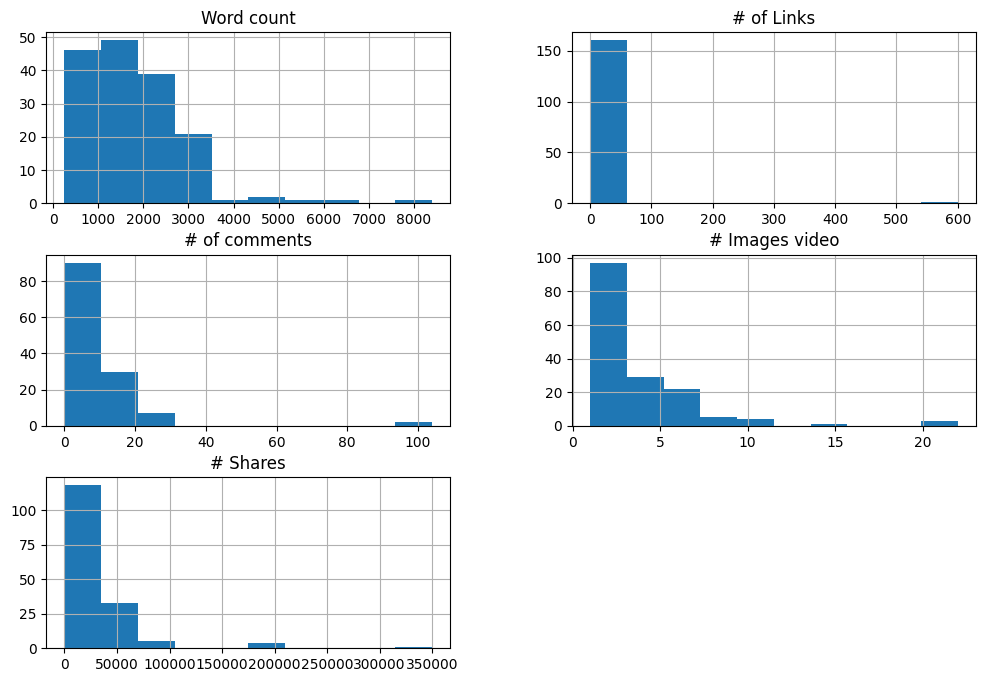

In [33]:
df.drop(["Title", "url", "Elapsed days"], axis=1).hist(figsize=(12,8))
plt.show()


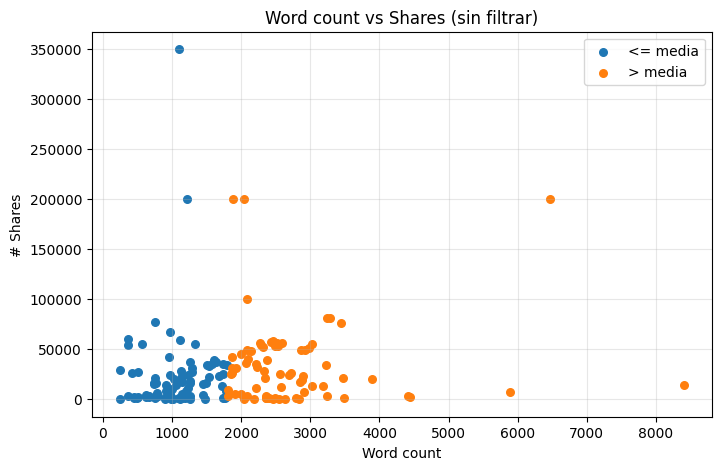

In [34]:
media_wc = 1808
x_wc = df["Word count"].to_numpy()
y_sh = df["# Shares"].to_numpy()

mask_mayor = x_wc > media_wc

plt.figure(figsize=(8,5))
plt.scatter(x_wc[~mask_mayor], y_sh[~mask_mayor], s=30, label="<= media")
plt.scatter(x_wc[mask_mayor], y_sh[mask_mayor], s=30, label="> media")
plt.title("Word count vs Shares (sin filtrar)")
plt.xlabel("Word count")
plt.ylabel("# Shares")
plt.grid(alpha=0.3)
plt.legend()
plt.show()


In [35]:
df_f = df[(df["Word count"] <= 3500) & (df["# Shares"] <= 80000)]
df_f.shape


(148, 8)

In [36]:
X = df_f[["Word count"]].to_numpy()
y = df_f["# Shares"].to_numpy()

modelo = LinearRegression()
modelo.fit(X, y)

y_pred = modelo.predict(X)

print("Pendiente:", float(modelo.coef_[0]))
print("Intercepto:", float(modelo.intercept_))
print("MSE:", float(mean_squared_error(y, y_pred)))
print("R2:", float(r2_score(y, y_pred)))


Pendiente: 5.697653657389773
Intercepto: 11200.30322307416
MSE: 372888728.3398661
R2: 0.05519842281951404


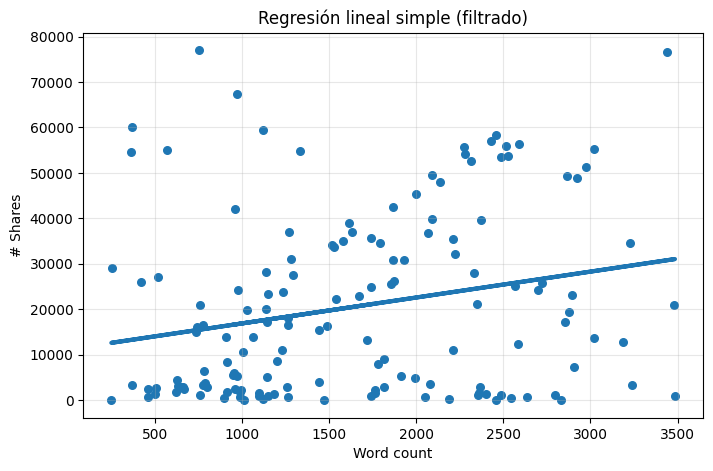

In [37]:
plt.figure(figsize=(8,5))
plt.scatter(X[:,0], y, s=30)
plt.plot(X[:,0], y_pred, linewidth=3)
plt.title("Regresión lineal simple (filtrado)")
plt.xlabel("Word count")
plt.ylabel("# Shares")
plt.grid(alpha=0.3)
plt.show()


In [38]:
test_wc = [[1850]]
pred = modelo.predict(test_wc)[0]
print(f"Predicción de shares para {test_wc[0][0]} palabras: {int(pred)}")


Predicción de shares para 1850 palabras: 21740
